# Graphs

**Packages**:

In [2]:
library(ggplot2)
library(scales)
library(dplyr)

In [3]:
setwd("H:/Forskerpraktik 2020/Final Data")

### By weekday

We start by loading the data set:

In [4]:
load("data_fp_2020_weekday.RData")
names(data_weekday)

[1] "weekday"        "keyhole_volume" "std_dev"        "se"

And continue to plot the average across weekdays:

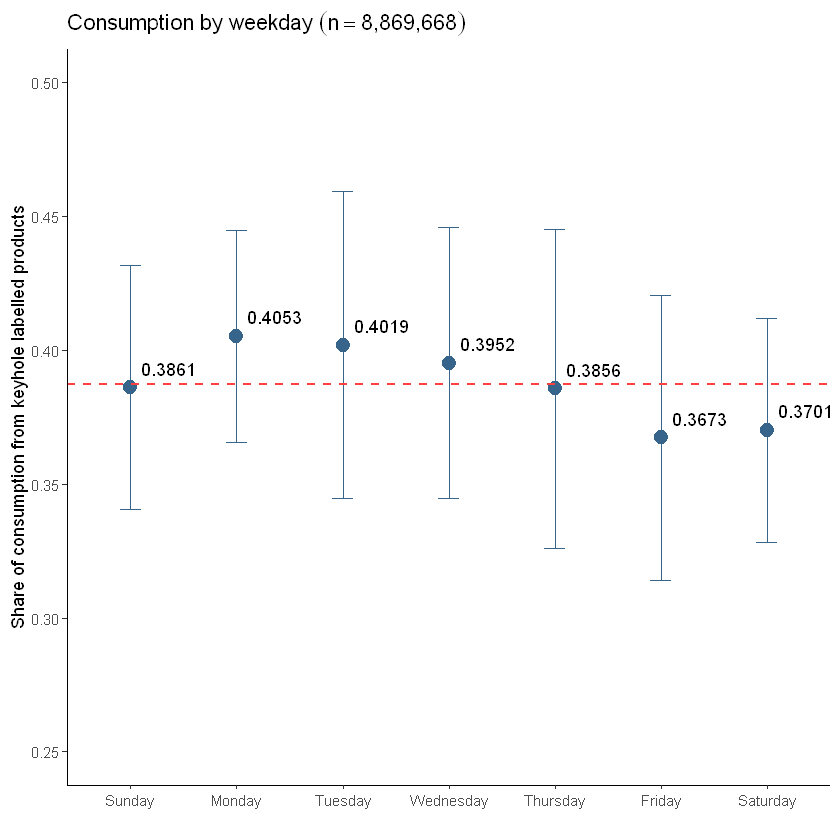

In [5]:
weekday_plot = ggplot(data = data_weekday, aes(x = weekday, y = keyhole_volume)) +
               geom_point(size = 3.5, col = "steelblue4") +
               geom_text(aes(label=keyhole_volume), hjust=-.2, vjust=-.9) +
               geom_errorbar(aes(ymin = keyhole_volume-std_dev, ymax = keyhole_volume+std_dev, x = weekday), width = .2,
                             col = "steelblue4") + 
               ylim(0.25, 0.5) +
               geom_hline(yintercept = mean(data_weekday$keyhole_volume), col="brown1", size=0.75, linetype = "dashed") +
               scale_x_discrete(limits = c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

weekday_plot + theme_classic() +
               labs(title = bquote("Consumption by weekday" ~ (n == "8,869,668")),
                    x = "", y = "Share of consumption from keyhole labelled products")

### Daily (2012-2017)

We start by loading the data set:

In [6]:
load("data_fp_2020.RData")
names(data)

[1] "date"           "keyhole_energy" "keyhole_volume"

And continue to plot the daily percentage of energy from keyhole labeled products:

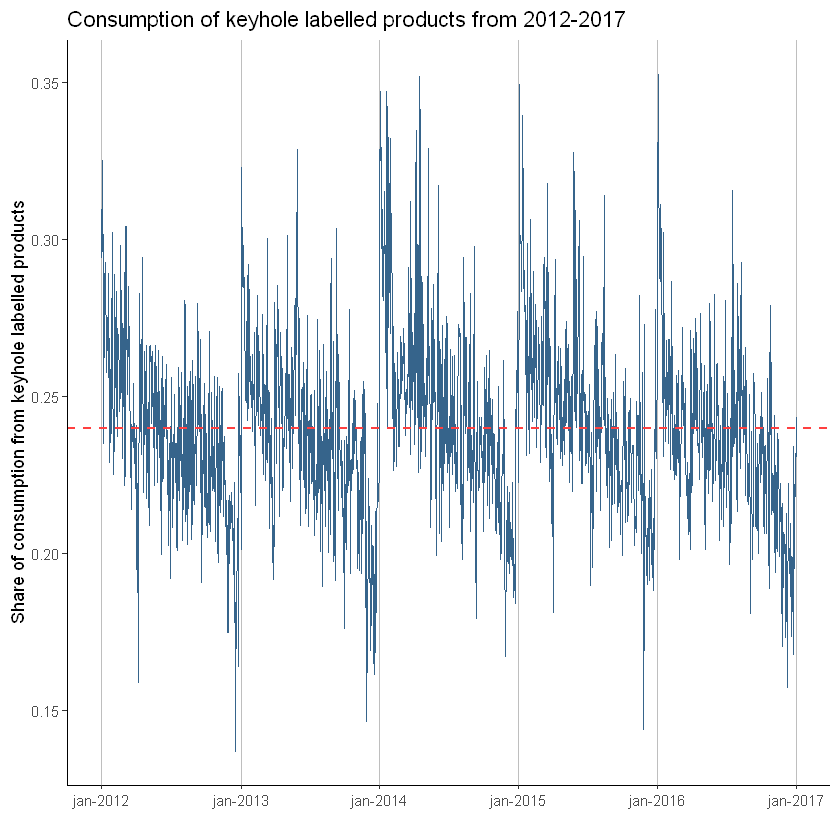

In [7]:
plot_daily = ggplot() + 
             geom_line(data = data, aes(x = as.Date(date), y = keyhole_energy), col = "steelblue4") +
             geom_hline(yintercept = mean(data$keyhole_energy), col = "brown1", linetype = "dashed", size = .7) +
             scale_x_date(date_breaks = "1 year", date_labels = "%b-%Y")

plot_daily + labs(title = bquote("Consumption of keyhole labelled products from 2012-2017"), y = "Share of consumption from keyhole labelled products", x = "") + 
             theme_classic() + theme(panel.grid.minor = element_blank(), panel.grid.major.x = element_line( size = .2, color = "grey") )

### Average year

Once again, we load the data and plot an 'average' year:

In [8]:
load("data_fp_2020_avg.RData")
names(data_avg)

[1] "date"           "keyhole_volume" "keyhole_energy"

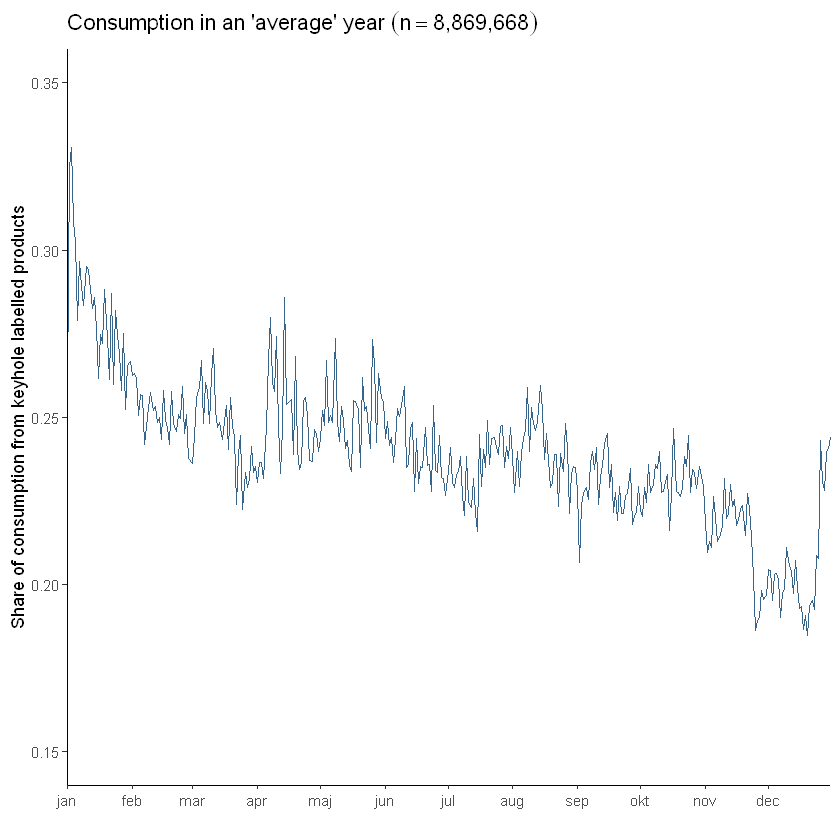

In [9]:
plot_avg = ggplot() +
           geom_line(data = data_avg, aes(x = as.Date(date), y = keyhole_energy), col = "steelblue4") +
           scale_x_date(date_breaks = "1 month", date_labels = "%b", expand = c(0,0)) + theme_classic() + 
           labs(title = bquote("Consumption in an 'average' year" ~ (n == "8,869,668")),
           x = "", y = "Share of consumption from keyhole labelled products") + ylim(0.15, 0.35)

plot_avg 

### Monthly average 

We then proceed to plot the average consumption of keyhole labeled products across months for the period 2012-2017:

In [10]:
load("data_fp_2020_monthly_avg.RData")
names(data_monthly_avg)

[1] "month"          "keyhole_energy" "sd"

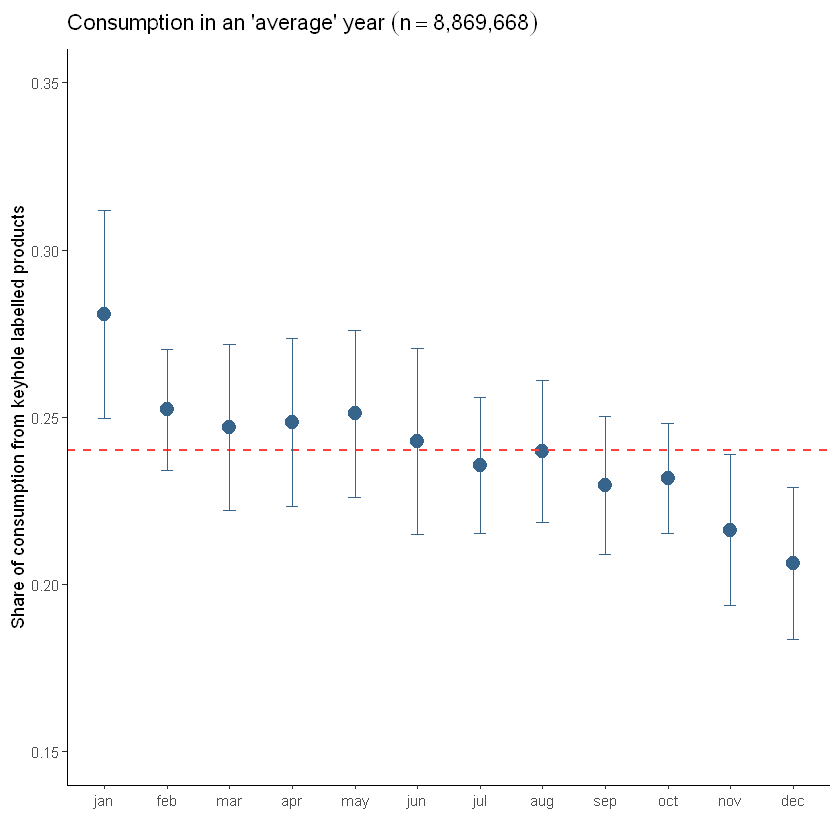

In [11]:
plot_avg_2 = ggplot () + 
             geom_point(data = data_monthly_avg, aes(x = month, y = keyhole_energy), col = "steelblue4", size = 3.5) + 
             theme_classic() + labs(title = bquote("Consumption in an 'average' year" ~ (n == "8,869,668")),
             x = "", y = "Share of consumption from keyhole labelled products") + ylim(0.15, 0.35) + 
             geom_hline(yintercept = mean(data_monthly_avg$keyhole_energy), col="brown1", size=0.75, linetype = "dashed") +
             scale_x_discrete(limits = c("jan", "feb", "mar", "apr",
                                         "may", "jun", "jul", "aug", "sep", 
                                         "oct", "nov", "dec")) + 
             geom_errorbar(data = data_monthly_avg, aes(ymin = keyhole_energy-sd, ymax = keyhole_energy+sd, x = month), width = .2, col = "steelblue4")

  


plot_avg_2